In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [162]:
pd.options.display.max_rows = 999

# Доступные данные

In [163]:
vertices = pd.read_csv('data\\vertices.csv') ## вершины ребер, то есть юр.лица
edges = pd.read_csv('data\\edges.csv') ## ребра графа, то есть транзакции между юр.лицами
test = pd.read_csv('data\\ids.csv') ## юр.лица, для которых необходимо восстановить ребра

Добавим в данные о вершинах информацию о том, представлено ли юр.лицо в тестовой выборке

In [164]:
test['in_test'] = [1]*len(test)
vertices = vertices.merge(test, how = 'left', on = 'id')
vertices['in_test'] = vertices['in_test'].fillna(0)

## Юр. лица

In [165]:
vertices.head()

,id,main_okved,region_code,company_type,in_test
0,1,46.75,77,Limited,0.0
1,2,41.20,78,Limited,0.0
2,3,25.11,50,Limited,0.0
3,4,45.31,89,Limited,0.0
4,5,56.10,50,Limited,0.0


1. id - id юр.лица
2. main_okved - код типа эк. деятельности
3. region_code - код региона(не понятно, внутренний банка или общепринятый РФ)
4. company_type - тип юр.лица

In [166]:
print('Количество юридических лиц:', len(vertices['id'].unique()))
print('Количество регионов:', len(vertices['region_code'].unique()))

Количество юридических лиц: 1534749
Количество регионов: 89


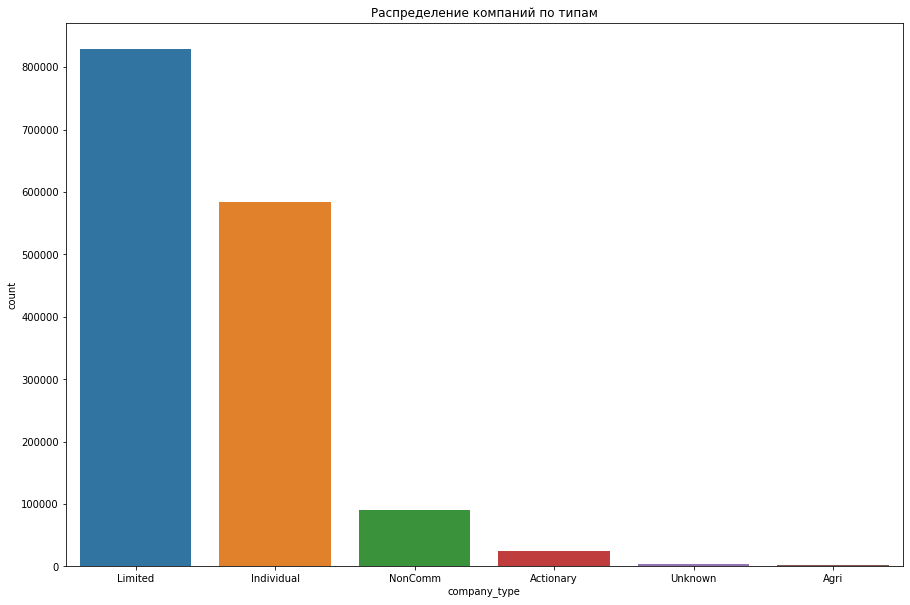

In [167]:
plt.figure(figsize = (15,10))
_ = sns.countplot(x = 'company_type',
              data = vertices,
              order = vertices['company_type'].value_counts().index)
_ = plt.title('Распределение компаний по типам')

Большинство компаний - ОО, дальше ИП. Остальные компании мало представлены в выборке

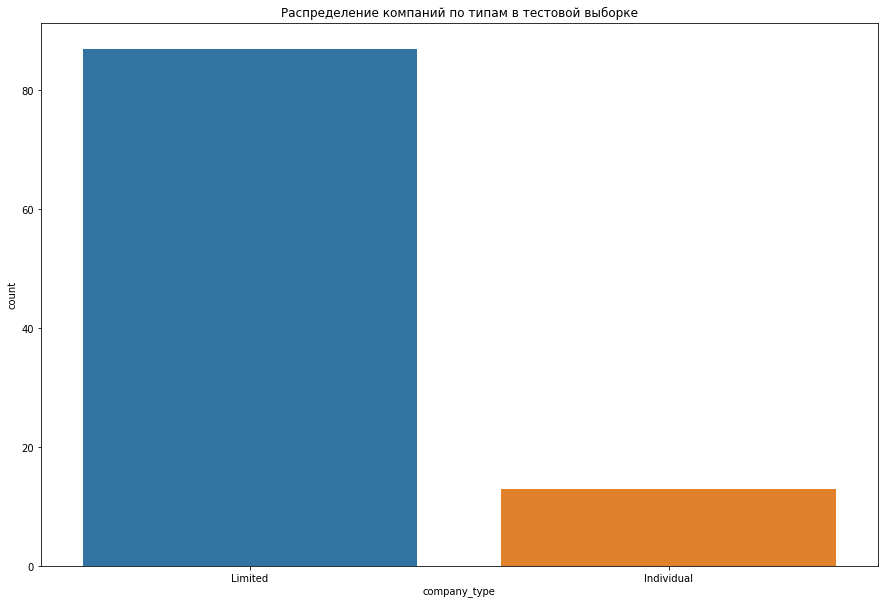

In [168]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'company_type',
              data = vertices[vertices['in_test'] == 1],
              order = vertices[vertices['in_test'] == 1]['company_type'].value_counts().index)
_ = plt.title('Распределение компаний по типам в тестовой выборке')

Таким образом, предсказать транзакции надо только для компаний типа ООО и ИП

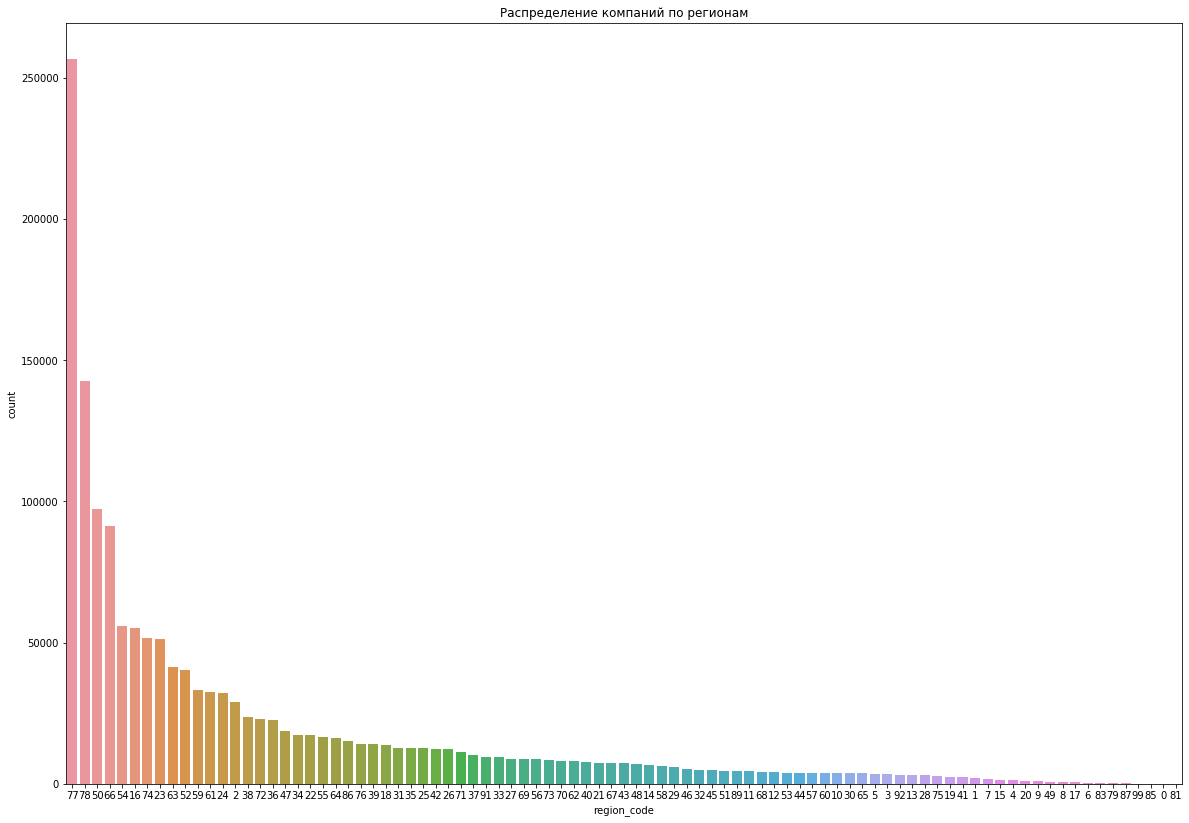

In [169]:
plt.figure(figsize = (20,14))
sns.countplot(x = 'region_code',
            data = vertices,
             order = vertices['region_code'].value_counts().index)
_ = plt.title('Распределение компаний по регионам')

Видно, что есть очень редкие регионы. Проверив их на сайте https://calcus.ru/kody-regionov обнаруживается, что таких регионов нет. Надо спросить, коды регион какие-то свои у банка, или это общепринятные. Во втором случае - удалить несуществующие регионы

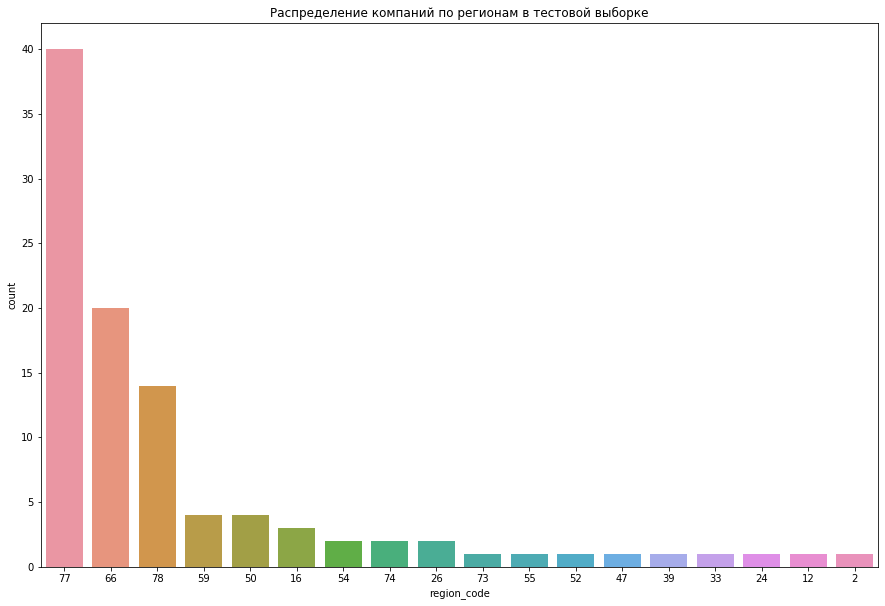

In [170]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'region_code',
              data = vertices[vertices['in_test'] == 1],
              order = vertices[vertices['in_test'] == 1]['region_code'].value_counts().index)
_ = plt.title('Распределение компаний по регионам в тестовой выборке')

Рассмотрим подробнее коды регионов РФ.

In [171]:
googled_regions = pd.read_html('http://www.formy-i-blanki.ru/kody-regionov-rossii')[1]
googled_regions = googled_regions.drop([0, 1, 88], axis = 'index')
googled_regions.columns = ['Номер региона', 'Название']
googled_regions = googled_regions.reset_index(drop = True)
googled_regions['Номер региона'] = googled_regions['Номер региона'].astype('str')

In [172]:
given_regions = pd.DataFrame({'Номер региона' : vertices['region_code'].sort_values().unique()})

In [173]:
for row_num in range(len(given_regions)):
    row = given_regions.iloc[row_num, ]
    if len(str(row['Номер региона'])) == 1:
        given_regions.loc[row_num, 'Номер региона'] = '0' + str(row['Номер региона'])

In [174]:
given_regions['Номер региона'] = given_regions['Номер региона'].astype('str')

In [175]:
pd.merge(given_regions, googled_regions, on = 'Номер региона', how = 'outer')

,Номер региона,Название
0,00,NaN
1,01,Республика Адыгея (Адыгея)
2,02,Республика Башкортостан
3,03,Республика Бурятия
4,04,Республика Алтай
5,05,Республика Дагестан
6,06,Республика Ингушетия
7,07,Кабардино-Балкарская Республика
8,08,Республика Калмыкия
9,09,Карачаево-Черкесская Республика


Код 85 принадлежал Усть-Ордынскому Бурятскому автономному округу, который в 2008 году был включен в состав Иркутской области.\
Код 81 принадлежал Коми-Пермяцкому автономному округу, который в 2005 году был включен в состав Пермского края.\
Код 00 не существовал\
Исправим ошибочные коды:

In [177]:
vertices['region_code'] = vertices['region_code'].replace(81, 59)
vertices['region_code'] = vertices['region_code'].replace(85, 38)
vertices['region_code'] = vertices['region_code'].astype('str')

In [178]:
googled_regions = googled_regions.replace({'01' : '1', '02' : '2', '03' : '3', '04' : '4', '05' : '5', '06' : '6', '07':'7', '08':'8','09':9 })

In [181]:
vertices = vertices.merge(googled_regions, left_on = 'region_code', right_on = 'Номер региона', how = 'left')

In [182]:
vertices

,id,main_okved,region_code,company_type,in_test,Номер региона,Название
0,1,46.75,77,Limited,0.0,77,г. Москва
1,2,41.20,78,Limited,0.0,78,Санкт-Петербург
2,3,25.11,50,Limited,0.0,50,Московская область
3,4,45.31,89,Limited,0.0,89,Ямало-Ненецкий автономный округ
4,5,56.10,50,Limited,0.0,50,Московская область
...,...,...,...,...,...,...,...
1534744,1534745,63.99,77,Individual,0.0,77,г. Москва
1534745,1534746,47.19,66,Individual,0.0,66,Свердловская область
1534746,1534747,41.20,77,Individual,0.0,77,г. Москва
1534747,1534748,74.20,33,Individual,0.0,33,Владимирская область


## Транзакции между юр.лицами

Транзакция в данном случае - наличие транзакций между двумя юр.лицами. То есть если между двумя юр.лицами есть, например 10 транзакций, то этому будет соответствовать лишь 1 строчка в данном датасете

In [183]:
print('Общее кол-во транзакций:', len(edges))

Общее кол-во транзакций: 4685644


Убедимся, что нет повторяющихся транзакций

In [184]:
edges.duplicated(subset = ['id_1', 'id_2']).sum()

0

In [185]:
full = edges.append(edges.rename(columns = {'id_1' : 'id_2', 'id_2' : 'id_1'}), ignore_index = True)
dup_rows = full.duplicated(subset = ['id_1', 'id_2'])
full.loc[dup_rows[dup_rows == True].index]

,id_1,id_2,value,n_transactions
5086622,300886,300886,337264.054992,1.000000
6635511,1133590,1133590,269362.357750,1.000000
6721840,1424123,1424123,541218.121845,207.791701
8161879,688858,688858,364952.429805,1.000000
8490326,1498686,1498686,364369.194070,1.000000
8719005,521149,521149,403572.192003,127.793751
8880477,1011876,1011876,432051.213968,1.000000
9318773,99690,99690,313391.376993,1.000000


Повторяющихся транзакций нет, но есть несколько транзакций, в которых обе фирмы - одно и тоже юр.лицо

Распределение сумм транакций

Text(0.5, 1.0, 'Распределение сумм транзакций')

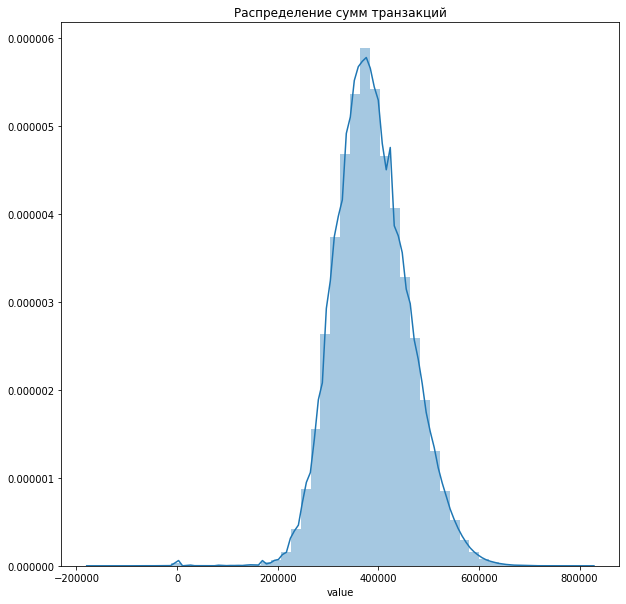

In [186]:
plt.figure(figsize = (10, 10))
_ = sns.distplot(edges['value'])
plt.title('Распределение сумм транзакций')

Видно, что есть транзакции, сумма по которым меньше нуля

In [187]:
edges[edges['value']<=0]

,id_1,id_2,value,n_transactions
17816,486409,668239,-929.067968,1.000000
20186,653530,1351736,-12924.908539,1.000000
22967,399362,1511629,-33503.504305,1.000000
26691,214944,932646,-169153.642766,1.000000
29253,613004,1323695,-169153.642766,1.000000
31352,360526,668823,-34434.509019,1.000000
34409,127685,753646,-169153.642766,1.000000
36329,448345,607105,-33503.504305,1.000000
44464,43347,433865,-30844.076726,1.000000
51429,704011,1072992,-169153.642766,1.000000


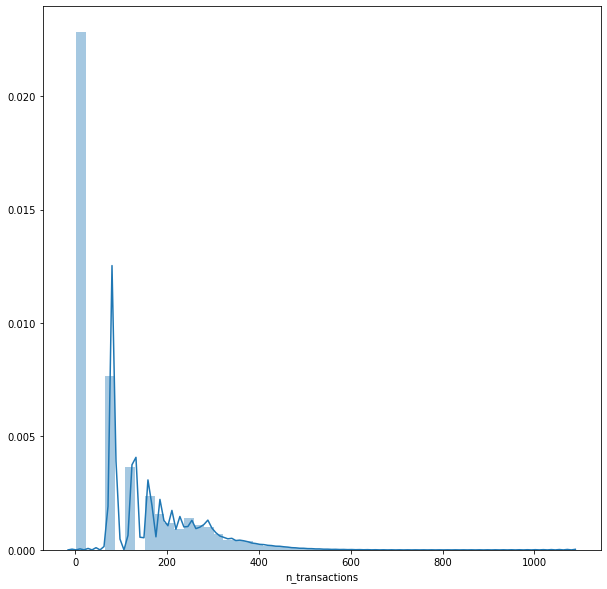

In [188]:
plt.figure(figsize = (10, 10))
_ =sns.distplot(edges['n_transactions'])

In [189]:
edges[edges['n_transactions']<=0]

,id_1,id_2,value,n_transactions


Отрицательного числа транзакий нет ни в одном наблюдении

Также проверим, есть ли данные о каких-либо транзакциях фирм из тестовой выборки

In [190]:
edges[(edges['id_1'].isin(test['id'])) | (edges['id_2'].isin(test['id']))]

,id_1,id_2,value,n_transactions
108,524354,958357,603806.854129,680.009802
194,80484,319548,618318.292139,709.868786
309,776150,786322,319477.793417,1.000000
312,524354,1096103,634027.465744,752.537756
342,776150,1300786,335005.892585,1.000000
...,...,...,...,...
4685417,263624,567406,348793.072040,1.000000
4685449,41216,328439,248231.700743,1.000000
4685479,41216,635885,314478.334609,1.000000
4685507,410574,1523148,363999.615865,1.000000


Информация о транзакциях фирм из тестовой выборки имеется, то есть надо восстановить оставшуюся информацию

In [191]:
num_of_test_firms_trans = edges[edges['id_1'].isin(test['id'])]['id_1'].value_counts().sort_index() + edges[edges['id_2'].isin(test['id'])]['id_2'].value_counts().sort_index()

Minimum number: 505


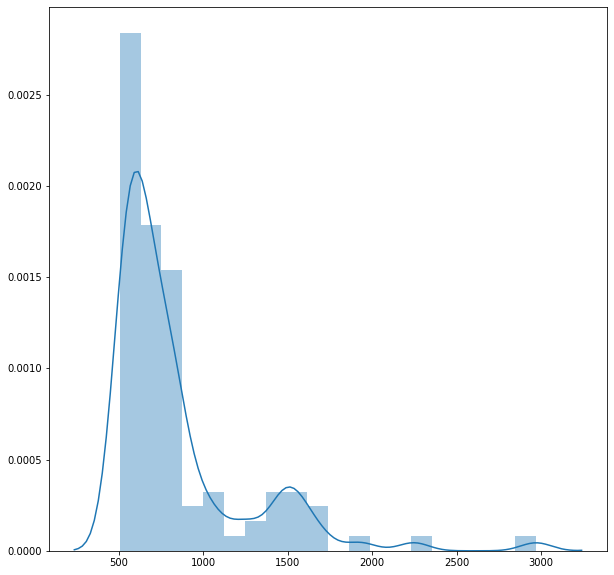

In [192]:
plt.figure(figsize = (10, 10))
_ = sns.distplot(num_of_test_firms_trans.values)
print('Minimum number:', num_of_test_firms_trans.min())

# Сетевой анализ

In [193]:
import igraph

Создадим граф

In [194]:
tuples = [tuple(x) for x in edges[['id_1', 'id_2']].values]
graph = igraph.Graph.TupleList(tuples, directed = False)

Добавим данные об атрибутах вершин (ОКВЭД компании, тип юр.лица и тд)

In [195]:
my_encoder = LabelEncoder()
vertices['company_type']= my_encoder.fit_transform(vertices['company_type'])

In [199]:
main_okved = vertices[vertices['id'].isin(graph.vs['name'])].set_index('id').loc[graph.vs['name'], :]['main_okved']
region = vertices[vertices['id'].isin(graph.vs['name'])].set_index('id').loc[graph.vs['name'], :]['region_code'].astype('int')
company_type = vertices[vertices['id'].isin(graph.vs['name'])].set_index('id').loc[graph.vs['name'], :]['company_type']

In [200]:
graph.vs['main_okved'] = main_okved.values
graph.vs['region'] = region.values
graph.vs['company_type'] = company_type.values

In [201]:
print(graph.assortativity_nominal('main_okved'))
print(graph.assortativity_nominal('region'))
print(graph.assortativity_nominal('company_type'))

0.09083051029176566
0.48295201914868063
0.051236893791644166


1. Ассортативность по ОКВЭД и типу компании низкий. Это говорит о том, что в целом компании не склонны делать транзакции лишь с компаниями с аналогичными ОКВЭД/типами
2. Ассоративность по региону в целом высокая. То есть компании чаще делают транзакции внутри региона.

Подробнее рассмотрим граф

Разобьем граф на множество несвязанных подграфов

In [202]:
decomposed_graph = graph.decompose()
print('Всего несвязанных подграфов: ', len(decomposed_graph))

Всего несвязанных подграфов:  4195


In [203]:
list_of_len = list(map(lambda x: x.vcount(), decomposed_graph))

In [204]:
pd.Series(list_of_len).sort_values(ascending = False)

0       1504613
126          20
629          15
49           14
16           13
         ...   
2768          2
2766          2
2765          2
2764          2
2097          2
Length: 4195, dtype: int64

То есть у нас имеется один большой граф с 1.5кк вершин и множество маленьких с маленьких количеством вершин.

In [209]:
small_graphs = list(map(lambda x: x.vs['name'], decomposed_graph[1:]))
list_of_small_vert = pd.Series([item for sublist in small_graphs for item in sublist]).unique()
print('Количество уникальных фирм в маленьких подграфах', len(list_of_small_vert))

Количество уникальных фирм в маленьких подграф 10100


In [210]:
pd.DataFrame(list_of_small_vert,
             columns = ['id']).merge(test, on = ['id'], how = 'inner')

,id,in_test


Все фирмы из тестовой выборки находятся в одном большом подграфе. В маленьких подграфах нет фирм из тестовой выборки\
Далее будем рассматривать один этот большой датафрейм